In [1]:
import numpy as np
import tensorflow as tf
import time

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [3]:
xy_train = np.random.randint(100, size=(10, 2)).astype("float")

In [4]:
xy_train

array([[24., 68.],
       [ 0., 71.],
       [48., 48.],
       [50., 17.],
       [19., 60.],
       [ 4., 72.],
       [92., 89.],
       [ 8., 35.],
       [19., 15.],
       [20., 76.]])

In [5]:
z_train = 5*xy_train[:,0] - 3*xy_train[:,1] + 7

In [6]:
z_train

array([ -77., -206.,  103.,  206.,  -78., -189.,  200.,  -58.,   57.,
       -121.])

In [7]:
# model = tf.keras.Sequential(tf.keras.layers.Dense(units=1, input_shape=[10,2]))

In [8]:
model = Sequential()
model.add(Dense(units=1, input_shape=[xy_train.shape[1]]))

In [9]:
model.compile(loss='mean_squared_error', optimizer=Adam(0.1), metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [11]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 200,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-3)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=500)

In [12]:
history = model.fit(xy_train, z_train, validation_split=0.1, epochs=2000, callbacks=[lrd, mcp])

Epoch 1/2000
1/1 [==============================] - 1s 974ms/step - loss: 38285.7578 - accuracy: 0.0000e+00 - val_loss: 672.3641 - val_accuracy: 0.0000e+00
Epoch 2/2000
1/1 [==============================] - 0s 23ms/step - loss: 36052.0938 - accuracy: 0.0000e+00 - val_loss: 1266.3719 - val_accuracy: 0.0000e+00
Epoch 3/2000
1/1 [==============================] - 0s 24ms/step - loss: 33993.9102 - accuracy: 0.0000e+00 - val_loss: 2039.3612 - val_accuracy: 0.0000e+00
Epoch 4/2000
1/1 [==============================] - 0s 24ms/step - loss: 32113.2715 - accuracy: 0.0000e+00 - val_loss: 2981.3174 - val_accuracy: 0.0000e+00
Epoch 5/2000
1/1 [==============================] - 0s 22ms/step - loss: 30410.6289 - accuracy: 0.0000e+00 - val_loss: 4077.2842 - val_accuracy: 0.0000e+00
Epoch 6/2000
1/1 [==============================] - 0s 20ms/step - loss: 28884.4082 - accuracy: 0.0000e+00 - val_loss: 5306.3276 - val_accuracy: 0.0000e+00
Epoch 7/2000
1/1 [==============================] - 0s 40ms/step

In [20]:
from sklearn.metrics import r2_score

In [21]:
xy_test = np.random.randint(100, size=(3, 2)).astype("float")

In [22]:
z_test = 5*xy_test[:,0] - 3*xy_test[:,1] + 7

In [23]:
z_test

array([ -21.,  116., -181.])

In [15]:
model.evaluate(xy_train, z_train)

1/1 [==============================] - 0s 16ms/step - loss: 6.3321e-06 - accuracy: 0.0000e+00


[6.332069460768253e-06, 0.0]

In [24]:
model.evaluate(xy_test, z_test)

1/1 [==============================] - 0s 15ms/step - loss: 3.8651e-06 - accuracy: 0.0000e+00


[3.865070993924746e-06, 0.0]

In [30]:
z_test

array([ -21.,  116., -181.])

In [25]:
z_pred = model.predict(xy_test)
z_pred

array([[ -21.001865],
       [ 115.997955],
       [-180.99802 ]], dtype=float32)

In [26]:
r2_score(z_test, z_pred)

0.9999999997376213

In [27]:
import matplotlib.pyplot as plt

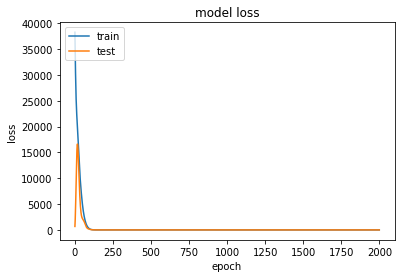

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
model.get_weights()

[array([[ 5.000028 ],
        [-2.9999113]], dtype=float32), array([6.9934416], dtype=float32)]